## **0. Import libraries**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

## **1. Load Data**

In [55]:
df_2015 = pd.read_csv('../data/2015.csv')
df_2016 = pd.read_csv('../data/2016.csv')
df_2017 = pd.read_csv('../data/2017.csv')   
df_2018 = pd.read_csv('../data/2018.csv')
df_2019 = pd.read_csv('../data/2019.csv')

### **1.1 Vista Previa de los Datos**
Visualizar las primeras filas de cada dataset para entender su estructura

In [56]:
print("="*80)
print("VISTA PREVIA DE LOS DATASETS")
print("="*80)

print("\n📋 Dataset 2015 (Primeras 5 filas):")
print(df_2015.head())

print("\n📋 Dataset 2016 (Primeras 5 filas):")
print(df_2016.head())

print("\n📋 Dataset 2017 (Primeras 5 filas):")
print(df_2017.head())

print("\n📋 Dataset 2018 (Primeras 5 filas):")
print(df_2018.head())

print("\n📋 Dataset 2019 (Primeras 5 filas):")
print(df_2019.head())

VISTA PREVIA DE LOS DATASETS

📋 Dataset 2015 (Primeras 5 filas):
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                 

### **1.2 Análisis de Nombres de Columnas**
Verificar si hay inconsistencias en los nombres de columnas entre diferentes años

In [57]:
print("="*80)
print("ANÁLISIS DE NOMBRES DE COLUMNAS")
print("="*80)

print("\n📊 Columnas en 2015:")
print(df_2015.columns.tolist())

print("\n📊 Columnas en 2016:")
print(df_2016.columns.tolist())

print("\n📊 Columnas en 2017:")
print(df_2017.columns.tolist())

print("\n📊 Columnas en 2018:")
print(df_2018.columns.tolist())

print("\n📊 Columnas en 2019:")
print(df_2019.columns.tolist())

# Comparar columnas entre años
print("\n" + "="*80)
print("COMPARACIÓN DE COLUMNAS ENTRE AÑOS")
print("="*80)

all_columns = {
    '2015': set(df_2015.columns),
    '2016': set(df_2016.columns),
    '2017': set(df_2017.columns),
    '2018': set(df_2018.columns),
    '2019': set(df_2019.columns)
}

# Encontrar columnas comunes a todos los años
common_columns = set.intersection(*all_columns.values())
print(f"\n✅ Columnas comunes en todos los años ({len(common_columns)}):")
print(sorted(common_columns))

# Encontrar columnas únicas por año
for year, cols in all_columns.items():
    unique = cols - common_columns
    if unique:
        print(f"\n⚠️ Columnas únicas en {year}:")
        print(sorted(unique))

ANÁLISIS DE NOMBRES DE COLUMNAS

📊 Columnas en 2015:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

📊 Columnas en 2016:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

📊 Columnas en 2017:
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

📊 Columnas en 2018:
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of cor

## **2. Análisis Exploratorio de los Datos - Preparación**

In [58]:
print("Dimensiones de cada dataset:")
print("2015:", df_2015.shape)
print("2016:", df_2016.shape)
print("2017:", df_2017.shape)
print("2018:", df_2018.shape)
print("2019:", df_2019.shape)

Dimensiones de cada dataset:
2015: (158, 12)
2016: (157, 13)
2017: (155, 12)
2018: (156, 9)
2019: (156, 9)


### **2.1 Análisis de Tipos de Datos**
Verificar que los tipos de datos sean correctos para cada columna

In [59]:
# Información de las columnas de cada dataset
print("\nInformación del dataset 2015:")
print(df_2015.info())
print("\nInformación del dataset 2016:")
print(df_2016.info())
print("\nInformación del dataset 2017:")
print(df_2017.info())
print("\nInformación del dataset 2018:")
print(df_2018.info())
print("\nInformación del dataset 2019:")
print(df_2019.info())


Información del dataset 2015:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int6

In [60]:
# Estadísticas descriptivas de cada dataset
print("\nEstadísticas descriptivas del dataset 2015:")
print(df_2015.describe())
print("\nEstadísticas descriptivas del dataset 2016:")
print(df_2016.describe())
print("\nEstadísticas descriptivas del dataset 2017:")
print(df_2017.describe())
print("\nEstadísticas descriptivas del dataset 2018:")
print(df_2018.describe())
print("\nEstadísticas descriptivas del dataset 2019:")
print(df_2019.describe())


Estadísticas descriptivas del dataset 2015:
       Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.4391

### **2.2 Porcentaje de Valores Nulos**
Calcular el porcentaje de datos faltantes para priorizar la limpieza

In [61]:
print("="*80)
print("PORCENTAJE DE VALORES NULOS POR COLUMNA")
print("="*80)

for year, df in [('2015', df_2015), ('2016', df_2016), ('2017', df_2017), 
                  ('2018', df_2018), ('2019', df_2019)]:
    print(f"\n📊 Dataset {year}:")
    null_percentages = (df.isnull().sum() / len(df) * 100).round(2)
    null_info = pd.DataFrame({
        'Valores Nulos': df.isnull().sum(),
        'Porcentaje (%)': null_percentages
    })
    # Filtrar solo columnas con valores nulos
    null_info = null_info[null_info['Valores Nulos'] > 0]
    if len(null_info) > 0:
        print(null_info.sort_values('Porcentaje (%)', ascending=False))
    else:
        print("✅ No hay valores nulos en este dataset")

PORCENTAJE DE VALORES NULOS POR COLUMNA

📊 Dataset 2015:
✅ No hay valores nulos en este dataset

📊 Dataset 2016:
✅ No hay valores nulos en este dataset

📊 Dataset 2017:
✅ No hay valores nulos en este dataset

📊 Dataset 2018:
                           Valores Nulos  Porcentaje (%)
Perceptions of corruption              1            0.64

📊 Dataset 2019:
✅ No hay valores nulos en este dataset


In [62]:
# Verificar valores duplicados en cada dataset
print("Número de filas duplicadas en el dataset 2015:", df_2015.duplicated().sum())
print("Número de filas duplicadas en el dataset 2016:", df_2016.duplicated().sum())
print("Número de filas duplicadas en el dataset 2017:", df_2017.duplicated().sum())
print("Número de filas duplicadas en el dataset 2018:", df_2018.duplicated().sum())
print("Número de filas duplicadas en el dataset 2019:", df_2019.duplicated().sum())

Número de filas duplicadas en el dataset 2015: 0
Número de filas duplicadas en el dataset 2016: 0
Número de filas duplicadas en el dataset 2017: 0
Número de filas duplicadas en el dataset 2018: 0
Número de filas duplicadas en el dataset 2019: 0
Número de filas duplicadas en el dataset 2016: 0
Número de filas duplicadas en el dataset 2017: 0
Número de filas duplicadas en el dataset 2018: 0
Número de filas duplicadas en el dataset 2019: 0


### **2.6 Análisis de Regiones**
Verificar la distribución de países por región (si existe la columna)

In [63]:
print("="*80)
print("ANÁLISIS DE REGIONES")
print("="*80)

for year, df in [('2015', df_2015), ('2016', df_2016), ('2017', df_2017), 
                  ('2018', df_2018), ('2019', df_2019)]:
    print(f"\n📊 Dataset {year}:")
    
    # Buscar columna de región
    region_col = None
    for col in df.columns:
        if 'region' in col.lower():
            region_col = col
            break
    
    if region_col:
        print(f"\n  Columna de región: {region_col}")
        print(f"  Número de regiones: {df[region_col].nunique()}")
        print(f"\n  Distribución de países por región:")
        region_counts = df[region_col].value_counts().sort_values(ascending=False)
        for region, count in region_counts.items():
            print(f"    {region}: {count} países")
    else:
        print("  ⚠️ No se encontró columna de región")

ANÁLISIS DE REGIONES

📊 Dataset 2015:

  Columna de región: Region
  Número de regiones: 10

  Distribución de países por región:
    Sub-Saharan Africa: 40 países
    Central and Eastern Europe: 29 países
    Latin America and Caribbean: 22 países
    Western Europe: 21 países
    Middle East and Northern Africa: 20 países
    Southeastern Asia: 9 países
    Southern Asia: 7 países
    Eastern Asia: 6 países
    North America: 2 países
    Australia and New Zealand: 2 países

📊 Dataset 2016:

  Columna de región: Region
  Número de regiones: 10

  Distribución de países por región:
    Sub-Saharan Africa: 38 países
    Central and Eastern Europe: 29 países
    Latin America and Caribbean: 24 países
    Western Europe: 21 países
    Middle East and Northern Africa: 19 países
    Southeastern Asia: 9 países
    Southern Asia: 7 países
    Eastern Asia: 6 países
    North America: 2 países
    Australia and New Zealand: 2 países

📊 Dataset 2017:
  ⚠️ No se encontró columna de región

📊 D

## **3. Análisis Visual por Dataset**

### **3.1 Visualizaciones 2015**

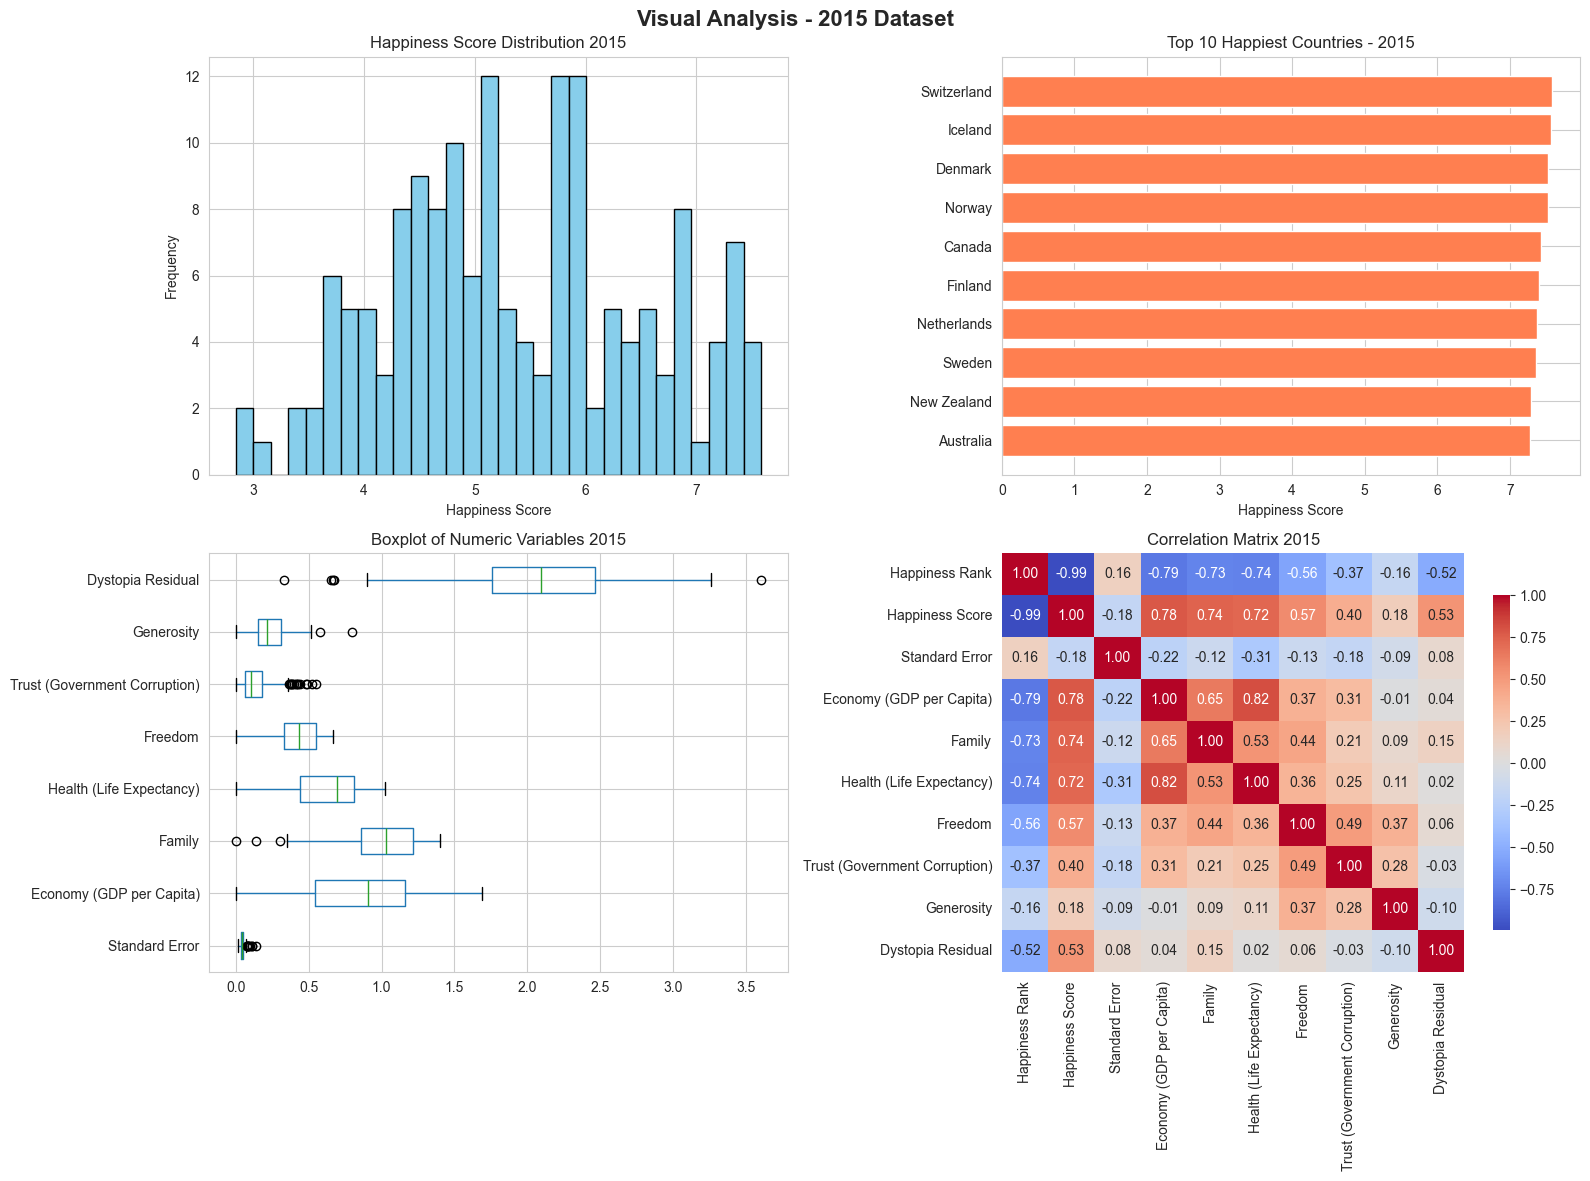

In [64]:
# Visualizations 2015
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visual Analysis - 2015 Dataset', fontsize=16, fontweight='bold')

# Histogram of Happiness Score
axes[0, 0].hist(df_2015.iloc[:, 3], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Happiness Score Distribution 2015')
axes[0, 0].set_xlabel('Happiness Score')
axes[0, 0].set_ylabel('Frequency')

# Top 10 countries
top10_2015 = df_2015.head(10)
axes[0, 1].barh(top10_2015.iloc[:, 0], top10_2015.iloc[:, 3], color='coral')
axes[0, 1].set_title('Top 10 Happiest Countries - 2015')
axes[0, 1].set_xlabel('Happiness Score')
axes[0, 1].invert_yaxis()

# Boxplot of numeric variables
numeric_cols = df_2015.select_dtypes(include=[np.number]).columns[2:]
df_2015[numeric_cols].boxplot(ax=axes[1, 0], vert=False)
axes[1, 0].set_title('Boxplot of Numeric Variables 2015')

# Correlation matrix
corr_matrix = df_2015.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1], cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('Correlation Matrix 2015')

plt.tight_layout()
plt.show()

### **3.2 Visualizaciones 2016**

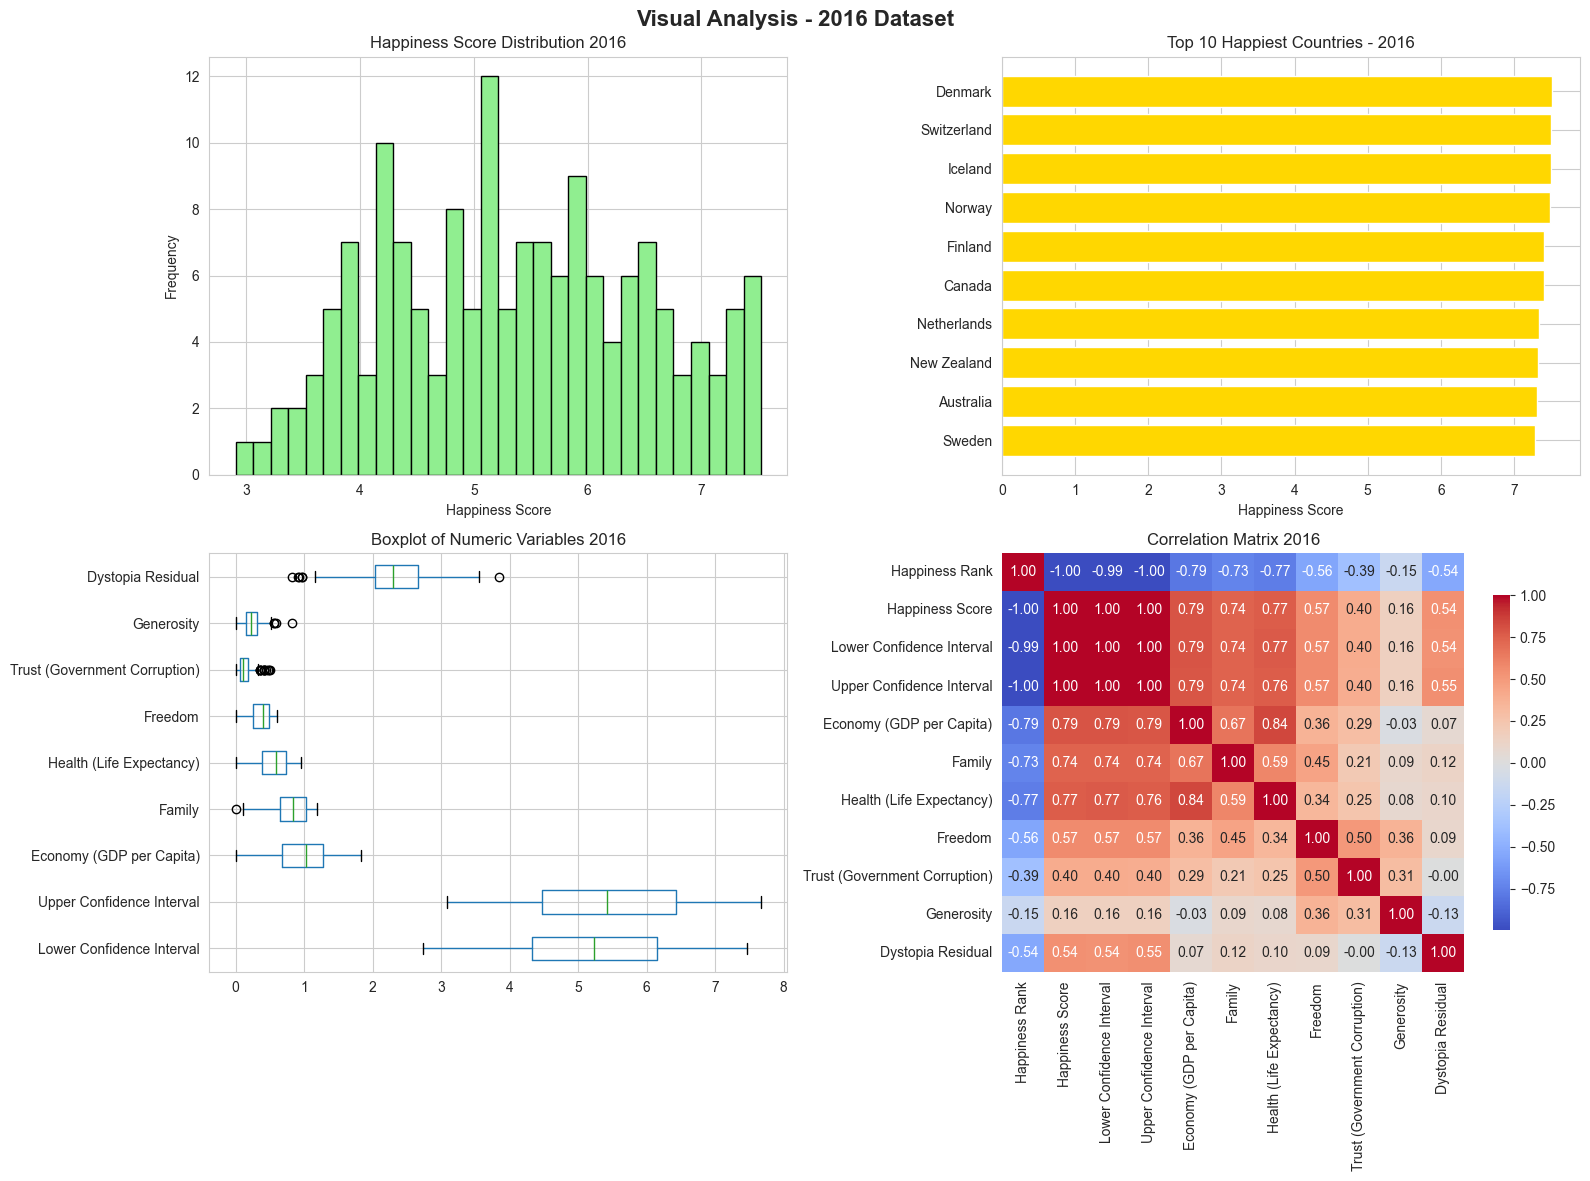

In [65]:
# Visualizations 2016
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visual Analysis - 2016 Dataset', fontsize=16, fontweight='bold')

# Histogram of Happiness Score
axes[0, 0].hist(df_2016.iloc[:, 3], bins=30, color='lightgreen', edgecolor='black')
axes[0, 0].set_title('Happiness Score Distribution 2016')
axes[0, 0].set_xlabel('Happiness Score')
axes[0, 0].set_ylabel('Frequency')

# Top 10 countries
top10_2016 = df_2016.head(10)
axes[0, 1].barh(top10_2016.iloc[:, 0], top10_2016.iloc[:, 3], color='gold')
axes[0, 1].set_title('Top 10 Happiest Countries - 2016')
axes[0, 1].set_xlabel('Happiness Score')
axes[0, 1].invert_yaxis()

# Boxplot of numeric variables
numeric_cols = df_2016.select_dtypes(include=[np.number]).columns[2:]
df_2016[numeric_cols].boxplot(ax=axes[1, 0], vert=False)
axes[1, 0].set_title('Boxplot of Numeric Variables 2016')

# Correlation matrix
corr_matrix = df_2016.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1], cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('Correlation Matrix 2016')

plt.tight_layout()
plt.show()

### **3.3 Visualizaciones 2017**

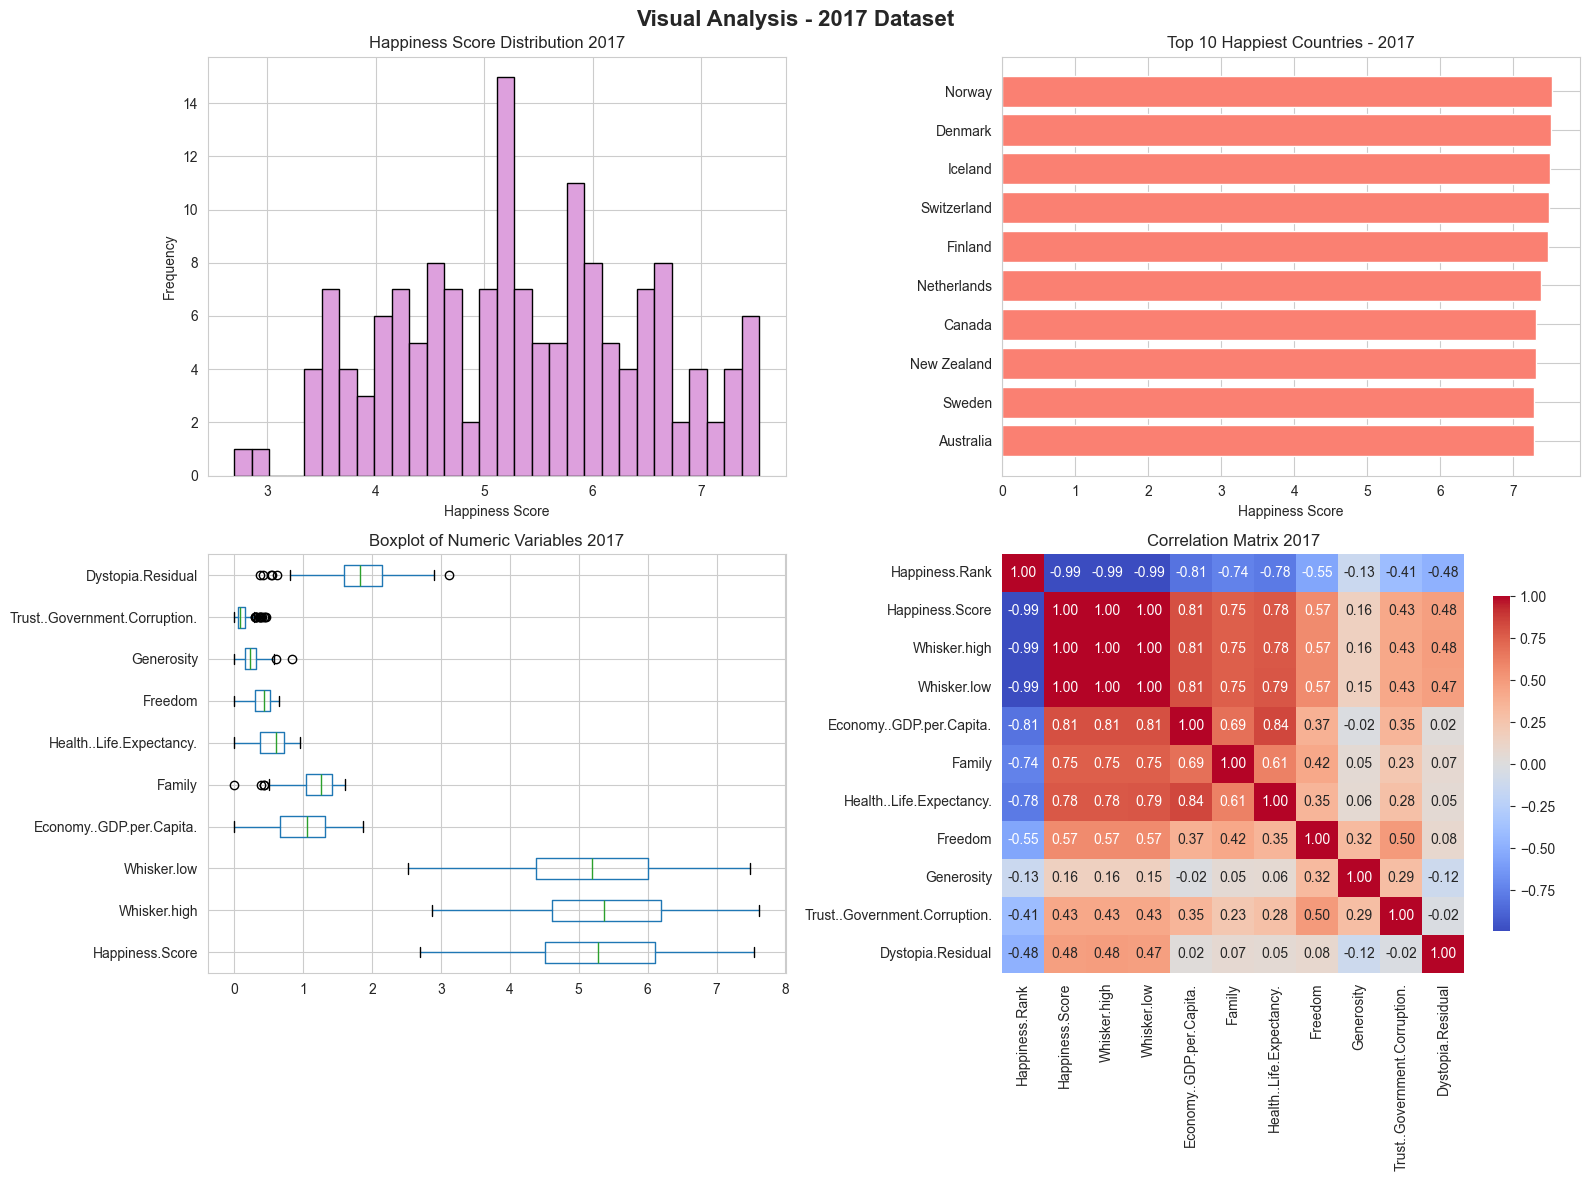

In [71]:
# Visualizations 2017
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visual Analysis - 2017 Dataset', fontsize=16, fontweight='bold')

# Histogram of Happiness Score
axes[0, 0].hist(df_2017.iloc[:, 2], bins=30, color='plum', edgecolor='black')
axes[0, 0].set_title('Happiness Score Distribution 2017')
axes[0, 0].set_xlabel('Happiness Score')
axes[0, 0].set_ylabel('Frequency')

# Top 10 countries
top10_2017 = df_2017.head(10)
axes[0, 1].barh(top10_2017.iloc[:, 0], top10_2017.iloc[:, 2], color='salmon')
axes[0, 1].set_title('Top 10 Happiest Countries - 2017')
axes[0, 1].set_xlabel('Happiness Score')
axes[0, 1].invert_yaxis()

# Boxplot of numeric variables
numeric_cols = df_2017.select_dtypes(include=[np.number]).columns[1:]
df_2017[numeric_cols].boxplot(ax=axes[1, 0], vert=False)
axes[1, 0].set_title('Boxplot of Numeric Variables 2017')

# Correlation matrix
corr_matrix = df_2017.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1], cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('Correlation Matrix 2017')

plt.tight_layout()
plt.show()

### **3.4 Visualizaciones 2018**

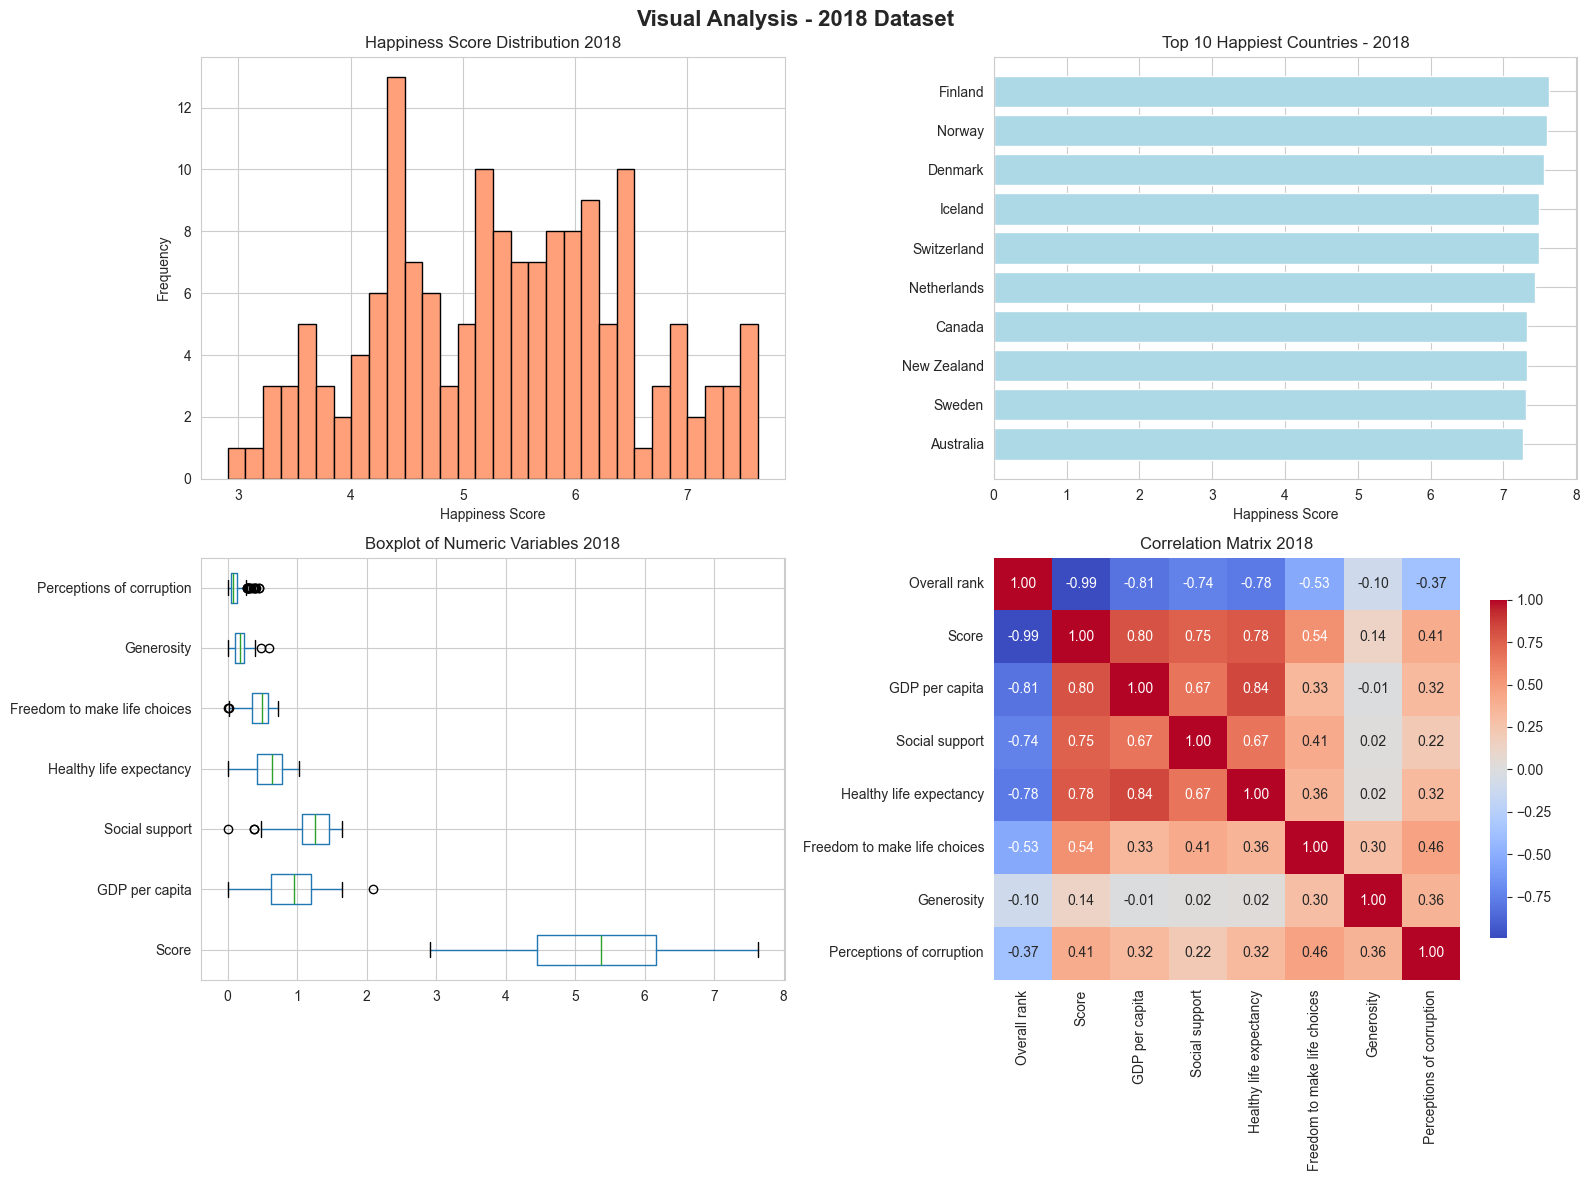

In [70]:
# Visualizations 2018
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visual Analysis - 2018 Dataset', fontsize=16, fontweight='bold')

# Histogram of Happiness Score
axes[0, 0].hist(df_2018.iloc[:, 2], bins=30, color='lightsalmon', edgecolor='black')
axes[0, 0].set_title('Happiness Score Distribution 2018')
axes[0, 0].set_xlabel('Happiness Score')
axes[0, 0].set_ylabel('Frequency')

# Top 10 countries
top10_2018 = df_2018.head(10)
axes[0, 1].barh(top10_2018.iloc[:, 1], top10_2018.iloc[:, 2], color='lightblue')
axes[0, 1].set_title('Top 10 Happiest Countries - 2018')
axes[0, 1].set_xlabel('Happiness Score')
axes[0, 1].invert_yaxis()

# Boxplot of numeric variables
numeric_cols = df_2018.select_dtypes(include=[np.number]).columns[1:]
df_2018[numeric_cols].boxplot(ax=axes[1, 0], vert=False)
axes[1, 0].set_title('Boxplot of Numeric Variables 2018')

# Correlation matrix
corr_matrix = df_2018.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1], cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('Correlation Matrix 2018')

plt.tight_layout()
plt.show()

### **3.5 Visualizaciones 2019**

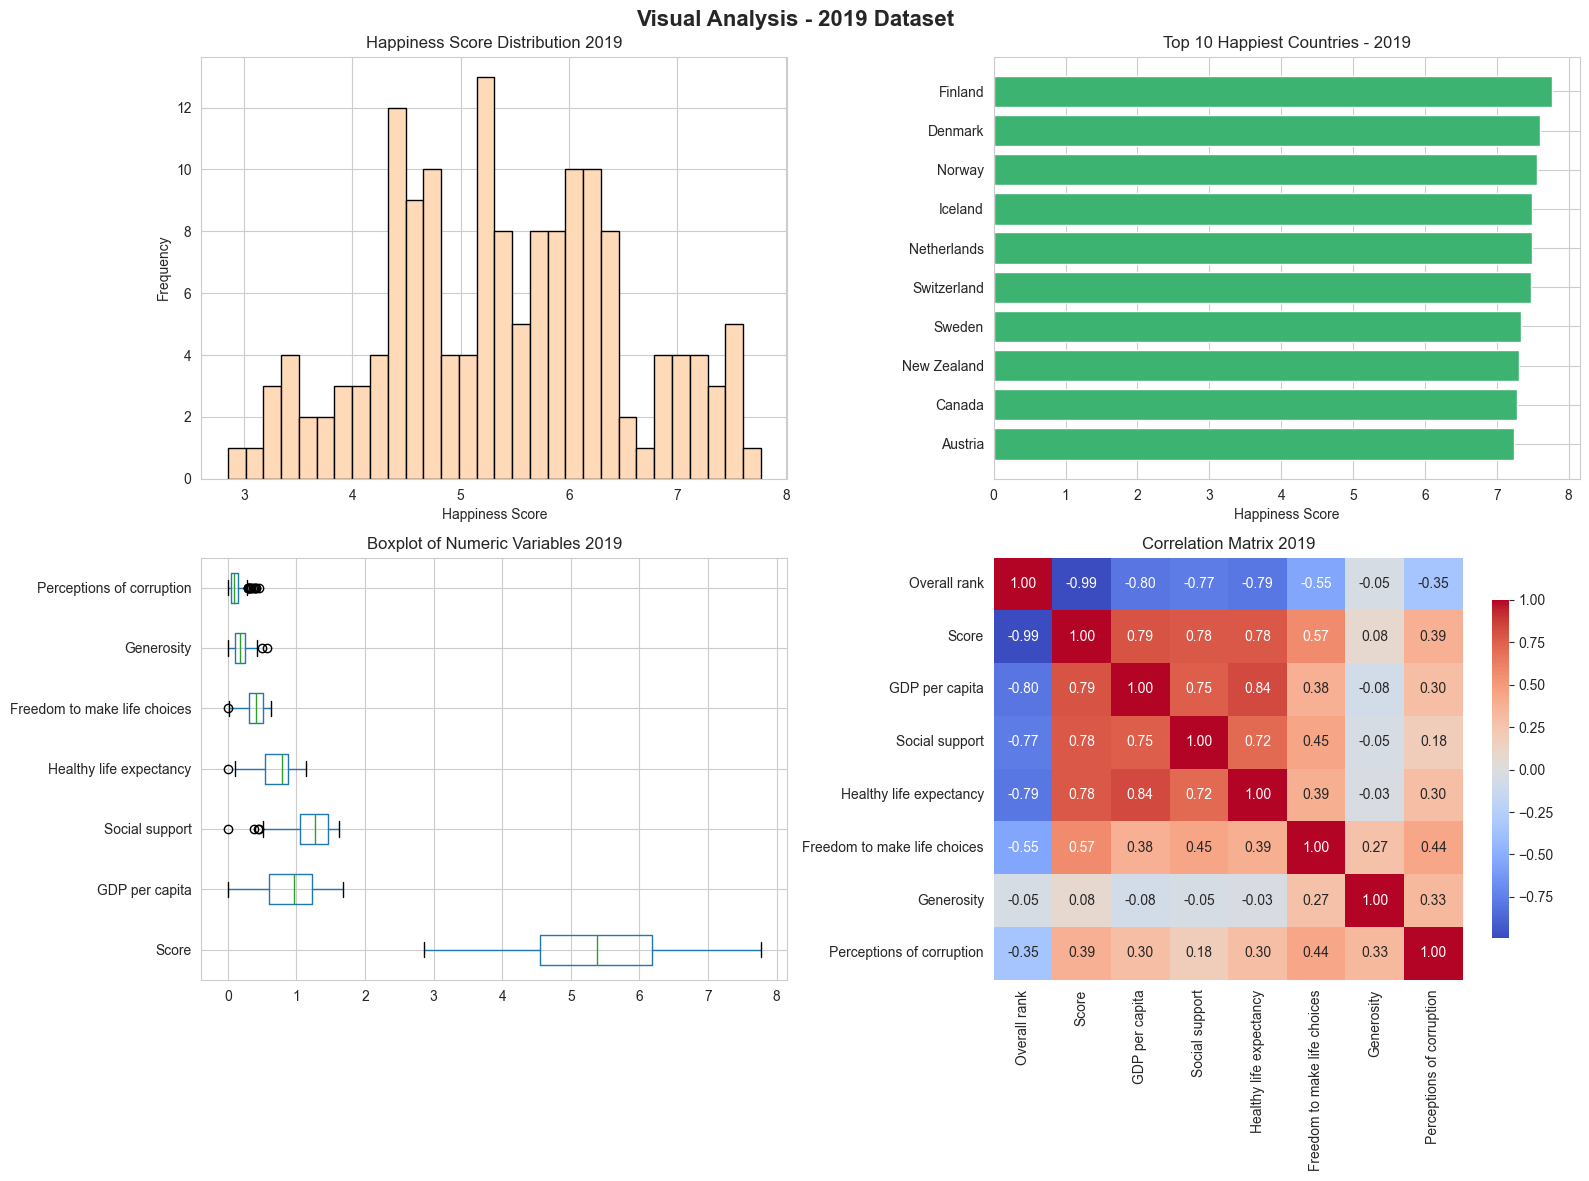

In [69]:
# Visualizations 2019
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visual Analysis - 2019 Dataset', fontsize=16, fontweight='bold')

# Histogram of Happiness Score
axes[0, 0].hist(df_2019.iloc[:, 2], bins=30, color='peachpuff', edgecolor='black')
axes[0, 0].set_title('Happiness Score Distribution 2019')
axes[0, 0].set_xlabel('Happiness Score')
axes[0, 0].set_ylabel('Frequency')

# Top 10 countries
top10_2019 = df_2019.head(10)
axes[0, 1].barh(top10_2019.iloc[:, 1], top10_2019.iloc[:, 2], color='mediumseagreen')
axes[0, 1].set_title('Top 10 Happiest Countries - 2019')
axes[0, 1].set_xlabel('Happiness Score')
axes[0, 1].invert_yaxis()

# Boxplot of numeric variables
numeric_cols = df_2019.select_dtypes(include=[np.number]).columns[1:]
df_2019[numeric_cols].boxplot(ax=axes[1, 0], vert=False)
axes[1, 0].set_title('Boxplot of Numeric Variables 2019')

# Correlation matrix
corr_matrix = df_2019.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1], cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('Correlation Matrix 2019')

plt.tight_layout()
plt.show()